# Data Structures Course 
Shiraz University Fall 2024    
Reza Rezazadegan   
[www.dreamintelligent.com](www.dreamintelligent.com) 

# 4- Hash tables

## Importance of searching
Searching is used in finding elements and also insertion and deletion.

We saw that searching in an unsorted array was $O(n)$ and in a sorted array $\Omega(\log n)$.Now we ask the question:

**Can looking up an element in an array or set be done in $O(1)$?**

We first show that this is not possible via _comparison search_. In a comparison search (such as linera or binary search), the target search key is compared to other keys in the list, until its index is found. We will show that a time complexity of $O(\log n)$ is the best that can be achieved for comparisn-based search.

_Hashing_ is a search method which is not comparison-based and achieves constant lookup time. Python dict and set data types are based on the hash table.


### Proof that comparison-based search cannot perform better than $\Omega(\log n)$
Such a search algorithm can be modeled using a _decision tree_. Each node corresponds to a coparison, which is of the forms $$<, >, \leq, \geq, =, \neq.$$ Since these are boolian operators, each node has two children corresponding to the True and False cases. 
Given a search query (whose index in the array we want to find), we start at the root of the tree and follow the comparisons till we get to a node which does not have any children (a _leaf_), which tells us the index of the searched item.

It follows that: 
- The number of leaves equals the size of the array.
- The number of comparisons required for looking up an item equals the length of a path from the root of the tree to a leaf. The maximum length of such a path is called the _height_ of the tree.

Thus, in the worst case, the number of comparisons for finding an element equals the height of the tree.  
The tree has $n$ leaves and so has more than $n$ nodes.  
The lowest height binary tree with $n$ elements is a _complete tree_ which has $2^i$ elements at distance $i$ from the root.  Such a tree has height $\log_2 n$. 




## Hashing

To understand the idea behind hashing, remember the birthday matchig problem from the first lecture. In that problem, given the next student, we had to look for his/her birthday in the list of other students. Instead we can use a map (dictionary) whose keys are dates (say, in the last 30 years) and the value corresponding to a key $d$ is the name of the student whose birthday is $d$ and is `None` if there is no such student. 

This way, we can check in $O(1)$ whether there is already a student with a given birthday! This is an example of a _direct access array_ in which the index of each item has a unique meaning. 
Te increased time efficiency of such an array comes at the cost of extra memory: you have to reserve memory even for the keys (indices) which are empty. For example there may be only 100 students in the class but you have to reserve space for 30*365 dates!

Hash tables use tricks to compress the space needed for a direct access array into $O(n)$.

Hashing is the process of mapping a search key to a limited range of  indices with the goal of providing direct access to the keys. 

In short, in a hash table, the index of an element is computed _from the key itself_. This computation is done using a _hash function_. 

A hash function computes the index for each search key.
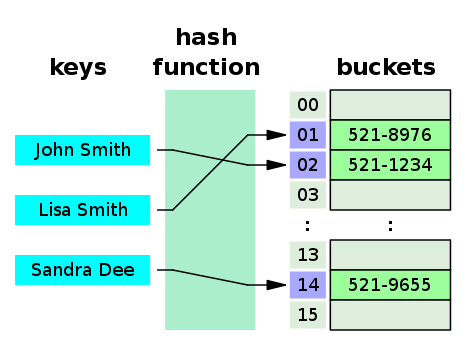

In a well-designed hash table, lookup time is constant. 

If unbounded memory is available, the key itself can be used as the index!
Since this is not the case, the hash function has to truncate the values, and thus may assign the same index to more than one value. This is called **collision**.


A hash function may be considered to perform three functions:

-    Convert variable-length keys into fixed length (usually machine word length or less) values, by folding them by words or other units using operator like ADD or XOR.
-    Scramble the bits of the key so that the resulting values are uniformly distributed over the keyspace.
-    Map the key values into ones less than or equal to the size of the table

We first restrict our attention to hash tables consisting of integers. In this case the simplest hash function is given by division by the size $M$ of the table:

`h(n)=n%M.`

The **load factor** of a hash table is the fraction of its cells which are occupied. As more items are added to the table, the load factor increases and with it the chance of collisions. We may need to resize the hash table in this case. 

## Collision handling
**Open addressing:** 
This is how most hash tables are implemented. Collisions are handled by looking for the following empty space in the table. If the first slot is already taken, the hash function is applied to the subsequent slots until one is left empty. There are various ways to use this approach, including double hashing, linear probing, and quadratic probing.

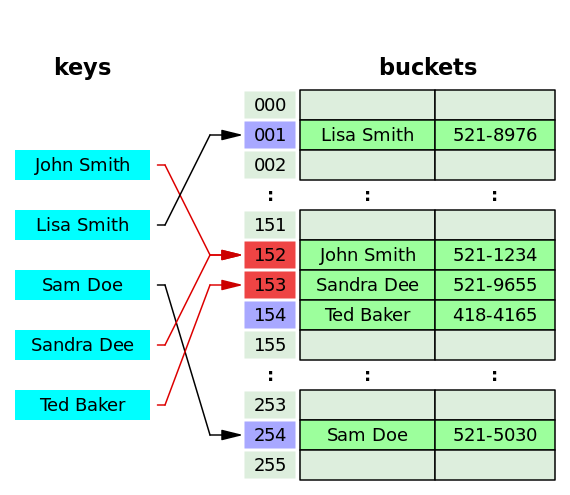


**Separate Chaining:** In separate chaining, a linked list of objects that hash to each slot in the hash table is present. Two keys are included in the linked list if they hash to the same slot. This method is rather simple to use and can manage several collisions.

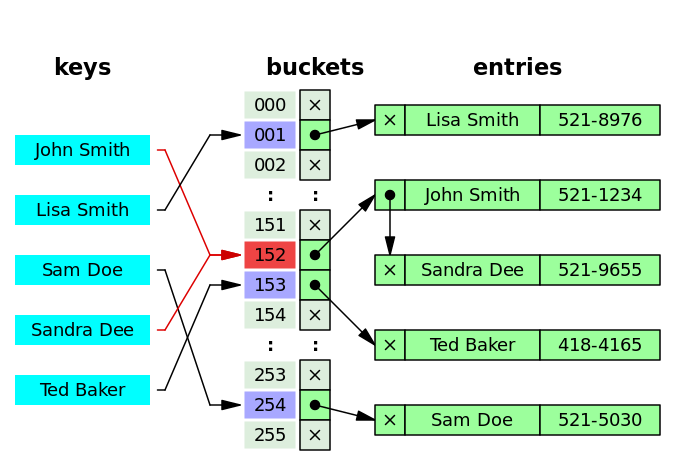

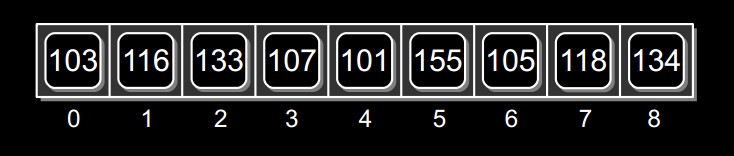

Simplest hash function:
`h(key)=key%M`

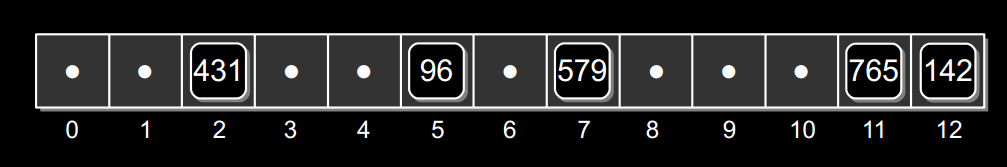

## Resolving collisions using open addressing
If the spot at $h(key)$ is already taken, we search forward for an empty spot, going to the begining of the array if necessary. So, we consider the spots `key%M+i` for $i=0,1,2, \ldots$ until we find an empty slot. This is called _linear probing_. 

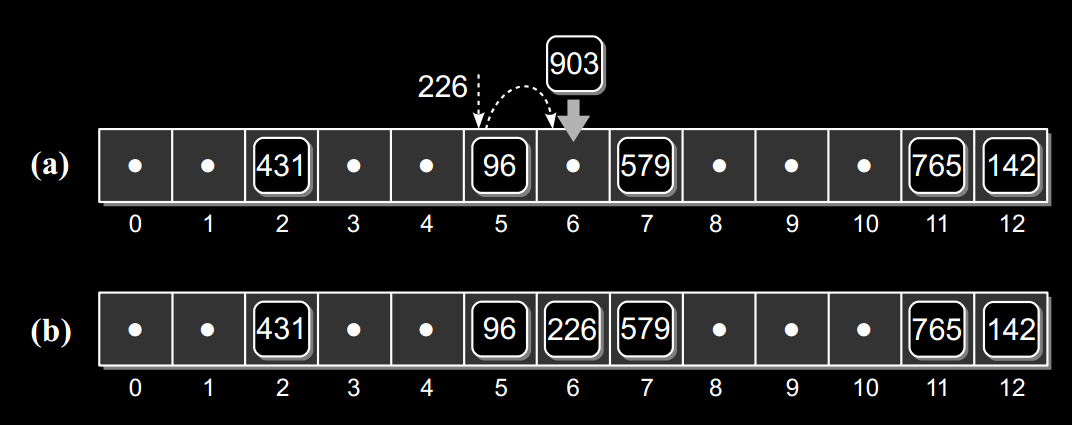
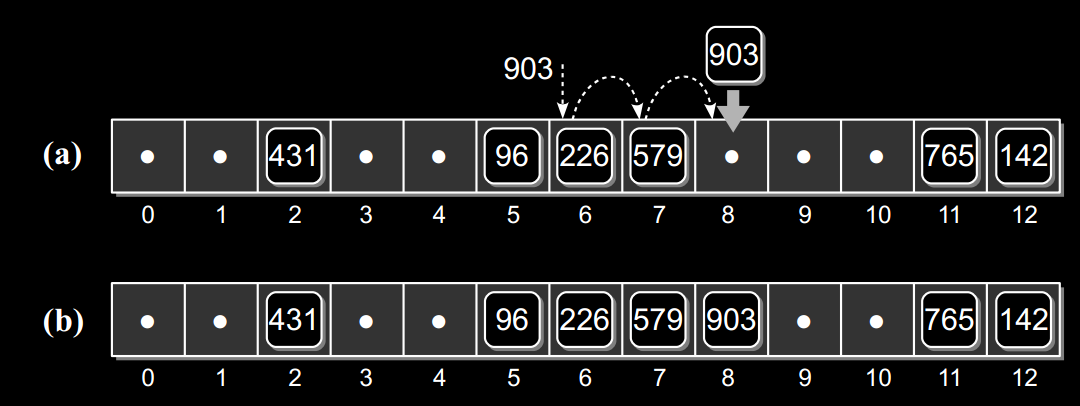
## Searching
It is very similar to the add operation.
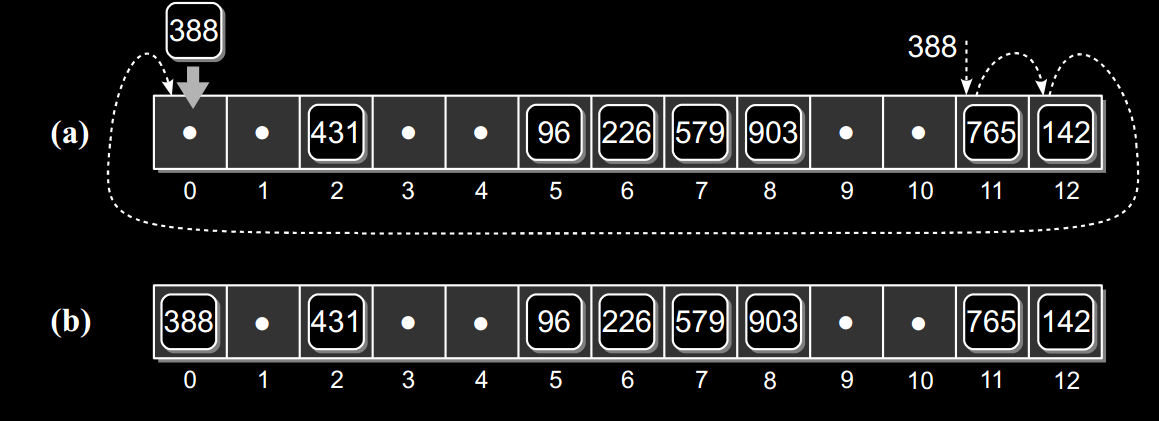

## Successful and unsuccessful search
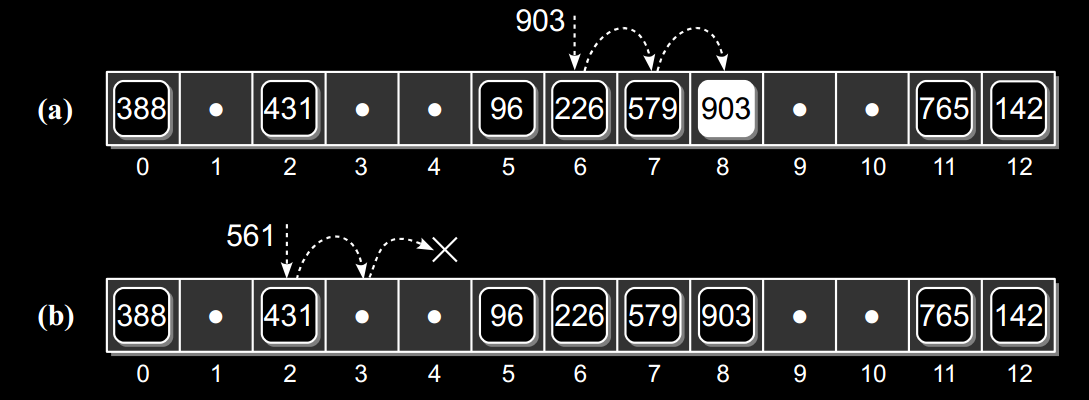

# Deletions
If we delete an item from a hash table, we need to mark its spot, because otherwise, other items in the chain (corresponding to the same hash value) cannot be found. 

Incorrect:
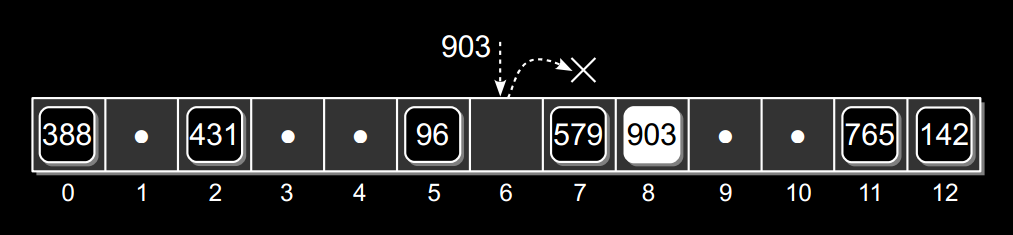

Correct:
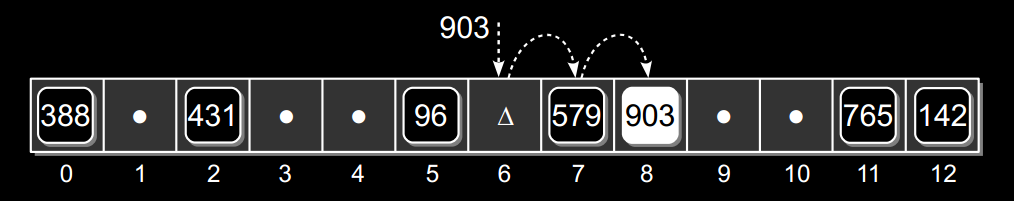

# Clustering
Clustering means hash table items lumping together. 
Clustering increases the risk of collisions and makes searching less efficient.  

Remember that we used linear probing `spot=(home+i)%M` where `home=key%M` is the original sopt associated to the item by hash function and `i` starts from 0, 1, 2,... till we find an empy spot. 

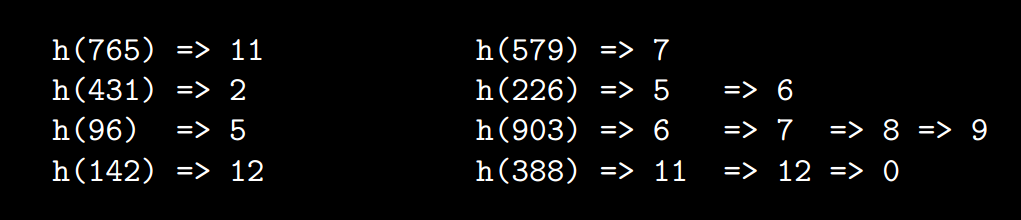

## Modified linear probe
We can use alternative methods for probing which decrease clustering.
This decreases clustering by spreading the colided items and making the hash table more sparse. 
`slot = (home + i ∗ c) % M`

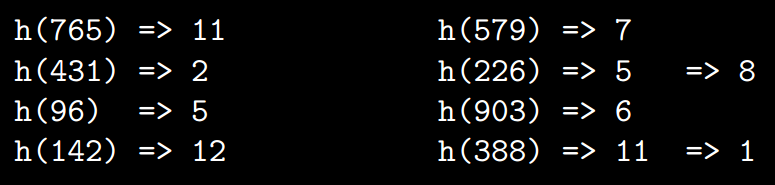

To ensure the probe sequence
includes all table entries, the constant factor c and the table size must be relatively
prime.

## Quadratic probing
`slot = (home + i^2) % M`

increases steps in the probe sequence
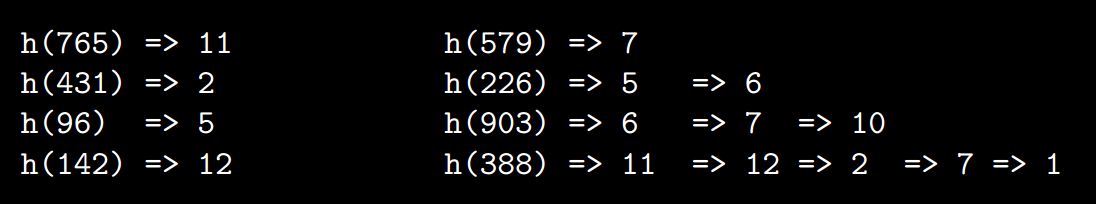

While the number of collisions has increased, the primary clustering has been
reduced. In practice, quadratic probing typically reduces the number of collisions
but introduces the problem of secondary clustering. Secondary clustering occurs when two keys map to the same table entry and have the same probe sequence.
For example, if we were to add key 648 to our table, it would hash to slot 11 and
follow the same probe sequence as key 388. Finally, there is no guarantee the
quadratic probe will visit every entry in the table.

## Double hashing

The quadratic probe distributes the keys by increasing steps in the probe sequence.
But the same sequence is followed by multiple keys that map to the same table entry, which results in the secondary clustering. This occurs because the probe equation is based solely on the original hash slot.

In double
hashing, when a collision occurs, the key is hashed by a second function and the
result is used as the constant factor in the linear probe:

`hp(key) = 1 + key % P`

`slot(i) = (home + i ∗ hp(key)) % M`  
Again  `home=key%M` and we take $i=0,1,2,\ldots$ till we find an empty spot.

While the step size remains constant throughout the probe, multiple keys that
map to the same table entry will have different probe sequences. 

If P=8:

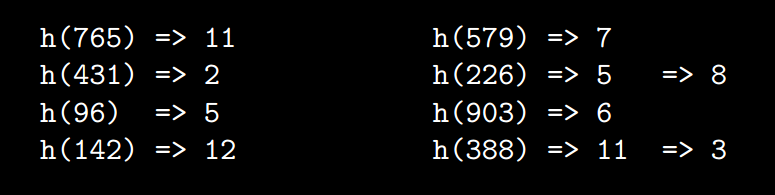

It reduces both primary and secondary clustering. 

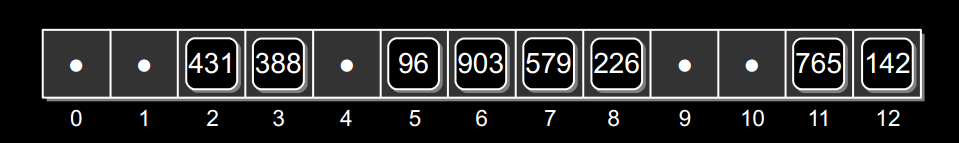

# Rehashing

When the hash table is filled and we want to move it to a larger one, we cannot simply copy the contents to the new one. Since the size of the table has changed, we need to compute the hash values anew. 

For example if we move the above table to a table of size 17, with a linear probe with c=1.

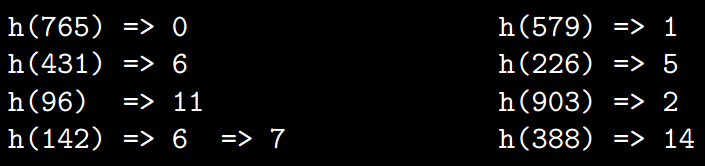

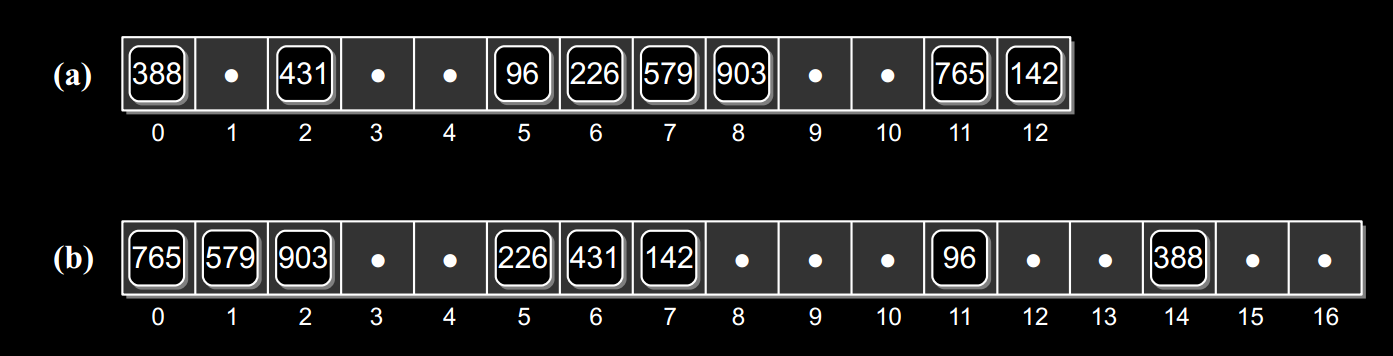


From practice, the table should be rehashed once the load factor reaches 80%. The new size should be at least twice, and a prime number. 

# Performance analysis

To evaluate the search performed in hashing, assume there are n elements
currently stored in the table of size m. In the best case, which only requires
constant time, the key maps directly to the table entry containing the target and
no collision occurs. When a collision occurs, however, a probe is required to find
the target key. In the worst case, the probe has to visit every entry in the table,
which requires O(m) time.

 Hashing is
very efficient in the average case. The average case assumes the keys are uniformly
distributed throughout the table. Efficiency depends on the average probe length and the
average probe length depends on the load factor $\alpha=n/m$. 

When using a linear probe, the average number of comparisons required to
locate a key in the hash table for a successful search is:

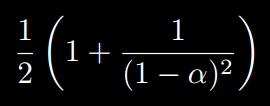

and for an unsuccessful search:

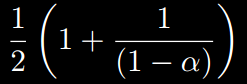



When using a quadratic probe or double hashing, the average number of comparisons required to locate a key for a successful search is:

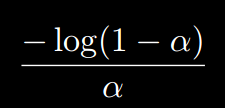

and for an unsuccessful search:

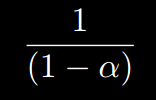

Average search times:
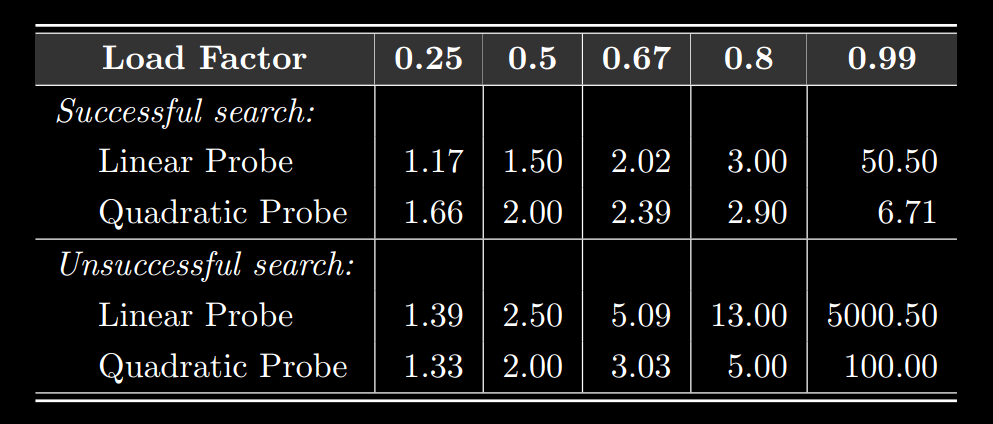

Based on experiments and the equations above, we can conclude that the hash
operations only require an average time of O(1) when the load factor is between
1/2 and 2/3.

# Separate chaining
Allows multiple keys to share the same entry and eliminates collisions!


To accommodate
multiple keys, linked lists can be used to store the individual keys that map to
the same entry. The linked lists are commonly referred to as chains.

New
keys can be prepended to the linked list since the nodes are in no particular order.


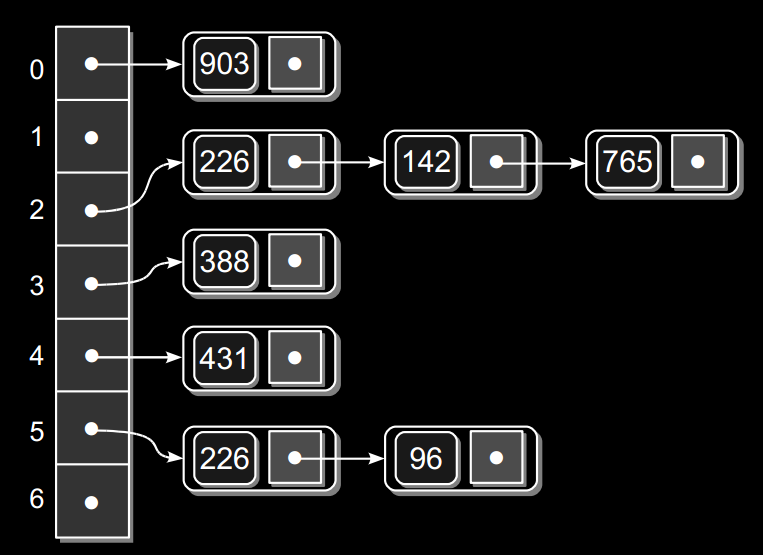

We no longer have to mark the entry as having been filled by a previously deleted key.


The load factor here can be >1. 

The average number of
comparisons required to locate a key in the hash table for a successful search is:
$1+\alpha/2$
and for an unsuccessful search is:
1 + α.


# More on hash functions

A “perfect” hash function will map every key to a different table entry, resulting in no collisions.

We try to design a good hash function that will distribute the keys across the range of hash table indices as evenly as possible.

- The computation of the hash should be simple in order to produce quick results.
- The resulting index cannot be random. When a hash function is applied multiple times to the same key, it must always return the same index value.
- If the key consists of multiple parts, every part should contribute in the computation of the resulting index value.
- The table size should be a prime number, especially when using the modulus operator. This can produce better distributions and fewer collisions as it tends to reduce the number of keys that share the same divisor.


When dealing with non-integer keys, the most common approach is to first convert the
key to an integer value and then apply an integer-based hash function to that
value. 

## Integer hash functions
Division: h(key) = key % M


Truncation: For large integers, some columns in the key value are ignored and not used in the
computation of the hash table index. In this case, the index is formed by selecting
the digits from specific columns and combining them into an integer within the
legal range of indices. 

Folding: In this method, the key is split into multiple parts and then combined into a single
integer value by adding or multiplying the individual parts. The resulting integer
value is then either truncated or the division method is applied to fit it within
the range of legal table entries. For example, given a key value 4873152 consisting
of seven digits, we can split it into three smaller integer values (48, 731, and 52)
and then sum these to obtain a new integer: 48 + 731 + 52 = 831.
This method can also.
be used when the keys store data with explicit components such as social security
numbers or phone numbers.


## Hashing strings
First we convert the string into an integer.
The simplest approach is to sum the ASCII values of the individual characters. 

Does not work well with large tables. A better approach is to use a poly:
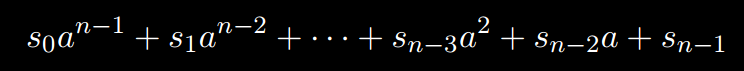


# Implementing the map (dict) data structure using a hash table

Similar to the way Python dict is implemented. 
We make use of Python's internal `hash` function, whose source code you can find [here](https://github.com/python/cpython/blob/main/Python/pyhash.c).

In [2]:
# Implementation of the Map ADT using closed hashing and a probe with
# double hashing.

# Storage class for holding the key/value pairs.
class _MapEntry :
    def __init__( self, key, value ):
        self.key = key
        self.value = value

from Array import Array 
class HashMap :
    # Defines constants to represent the status of each table entry.
    UNUSED = None
    EMPTY = _MapEntry( None, None )

    # Creates an empty map instance.
    def __init__( self ):
        self._table = Array( 7 )
        self._count = 0
        self._maxCount = len(self._table) - len(self._table) // 3

    # Returns the number of entries in the map.
    def __len__( self ):
        return self._count

    # Determines if the map contains the given key.
    def __contains__( self, key ):
        slot = self._findSlot( key, False )
        return slot is not None

    # Adds a new entry to the map if the key does not exist. Otherwise, the
    # new value replaces the current value associated with the key.
    def add( self, key, value ):
        if key in self :
            slot = self._findSlot( key, False )
            self._table[slot].value = value
            return False
        else :
            slot = self._findSlot( key, True )
            self._table[slot] = _MapEntry( key, value )
            self._count += 1
            if self._count == self._maxCount :
                self._rehash()
        return True

    # Returns the value associated with the key.
    def valueOf( self, key ):
        slot = self._findSlot( key, False )
        assert slot is not None, "Invalid map key."
        return self._table[slot].value

    # Removes the entry associated with the key.
    def remove( self, key ):
        slot = self._findSlot( key, False )
        if not slot:
            return
        
        self._table[slot]=EMPTY
    
    
    # Returns an iterator for traversing the keys in the map.
    def __iter__( self ):
        return


    # Finds the slot containing the key or where the key can be added.
    # forInsert indicates if the search is for an insertion, which locates
    # the slot into which the new key can be added.
    def _findSlot( self, key, forInsert ):
        # Compute the home slot and the step size.
        slot = self._hash1( key )
        step = self._hash2( key )

        # Probe for the key.
        M = len(self._table)
        while self._table[slot] is not UNUSED :
            if forInsert and \
            (self._table[slot] is UNUSED or self._table[slot] is EMPTY) :
                return slot
            elif not forInsert and \
            (self._table[slot] is not EMPTY and self._table[slot].key == key) :
                return slot
            else :
                slot = (slot + step) % M
        return None
    
    # Rebuilds the hash table.
    def _rehash( self ) :
        # Create a new larger table.
        origTable = self._table
        newSize = len(self._table) * 2 + 1
        self._table = Array( newSize )

        # Modify the size attributes.
        self._count = 0
        self._maxCount = newSize - newSize // 3

        # Add the keys from the original array to the new table.
        for entry in origTable :
            if entry is not UNUSED and entry is not EMPTY :
                key=entry.key
                slot = self._findSlot( key, True )
                self._table[slot] = entry
                self._count += 1

    # The main hash function for mapping keys to table entries.
    def _hash1( self, key ):
        return abs( hash(key) ) % len(self._table)

    # The second hash function used with double hashing probes.
    def _hash2( self, key ):
        return 1 + abs( hash(key) ) % (len(self._table) - 2)



# Application: histograms

A histogram is a container that can be used to collect and store discrete frequency
counts across multiple categories representing a distribution of data. 


In [ ]:
# Implementation of the Histogram ADT using a Hash Map. 

class Histogram :
    # Creates a histogram containing the given categories.
    def __init__( self, catSeq ):
        self._freqCounts = HashMap()
        for cat in catSeq :
            self._freqCounts.add( cat, 0 )

    # Returns the frequency count for the given category.
    def getCount( self, category ):
        assert category in self._freqCounts, "Invalid histogram category."
        return self._freqCounts.valueOf( category )


    # Increments the counter for the given category.
    def incCount( self, category ):
        assert category in self._freqCounts, "Invalid histogram category."
        value = self._freqCounts.valueOf( category )
        self._freqCounts.add( category, value + 1 )

    # Returns the sum of the frequency counts.
    def totalCount( self ):
        total = 0
        for cat in self._freqCounts :
            total += self._freqCounts.valueOf( cat )
        return total

    # Returns an iterator for traversing the categories.
    def __iter__( self ):
        return iter( self._freqCounts )

: 

In [6]:
 # Prints a histogram for a distribution of letter grades computed
 # from a collection of numeric grades extracted from a text file. 
#from maphist import Histogram

def main():
    # Create a Histogram instance for computing the frequencies.
    gradeHist = Histogram( "ABCDF" )

    # Open the text file containing the grades.
    gradeFile = open('cs101grades.txt', "r")

    # Extract the grades and increment the appropriate counter.
    for line in gradeFile :
        grade = int(line)
        gradeHist.incCount( letterGrade(grade) )
    # Print the histogram chart.
    printChart( gradeHist )

    # Determines the letter grade for the given numeric value.
    def letterGrade( grade ):
        if grade >= 90 :
            return 'A'
        elif grade >= 80 :
            return 'B'
        elif grade >= 70 :
            return 'C'
        elif grade >= 60 :
            return 'D'
        else :
            return 'F'

# Prints the histogram as a horizontal bar chart.
def printChart( gradeHist ):
    print( " Grade Distribution" )
    # Print the body of the chart.
    letterGrades = ( 'A', 'B', 'C', 'D', 'F' )
    for letter in letterGrades :
        print( " |" )
        print( letter + " +", end = "" )
        freq = gradeHist.getCount( letter )
        print( '*' * freq )

    # Print the x-axis.
    print( " |" )
    print( " +----+----+----+----+----+----+----+----" )
    print( " 0 5 10 15 20 25 30 35" )

# Calls the main routine.
main()

ModuleNotFoundError: No module named 'maphist'

## Color histograms

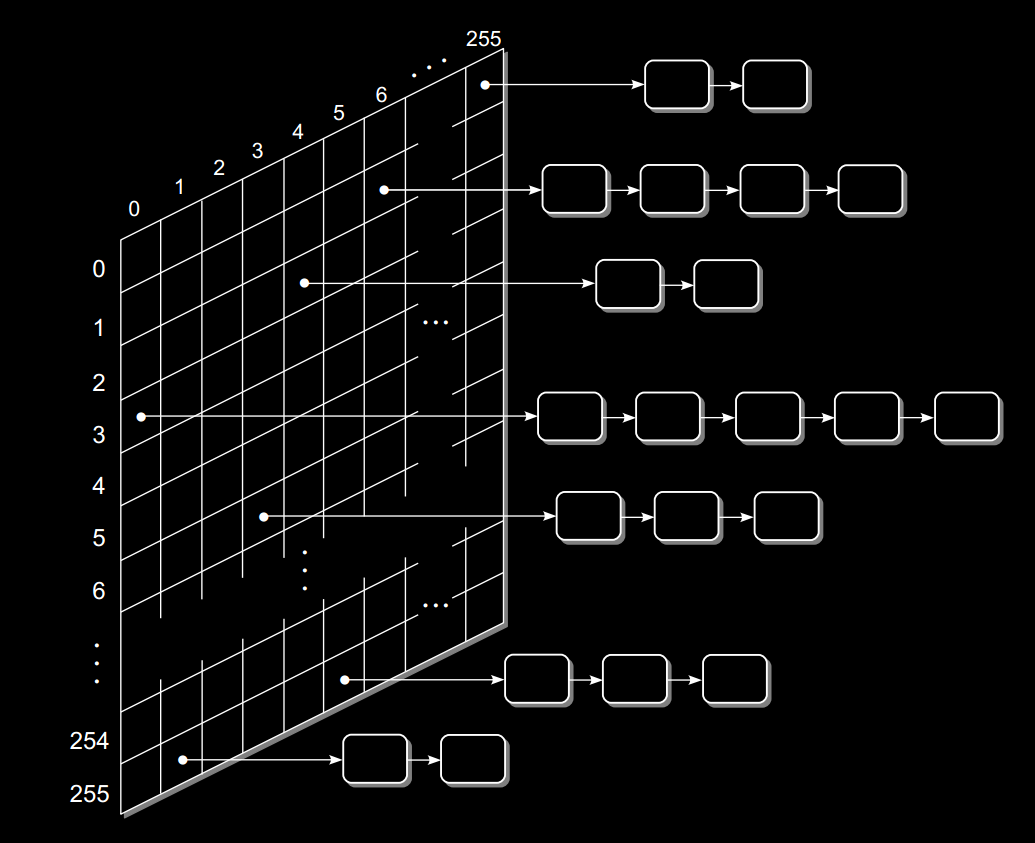

# Exercises

1- Implement a hash table that uses separate chaining.  

2- Assume an initially empty hash table with 11 entries in which the hash function uses the division method. Show the contents of the hash table after the following keys are inserted (in the order listed), assuming the indicated type
of probe is used: 67, 815, 45, 39, 2, 901, 34.

(a) linear probe (with c = 1)  
(b) linear probe (with c = 3)  
(c) quadratic probe  
(d) double hashing with `hp(key) = (key ∗ 3) % 7`
(e) separate chaining  


3- Consider a hash table of size 501 that contains 85 keys.
- (a) What is the load factor?
- (b) What is the average number of comparisons required to determine if the collection contains the key 73, if:
- - i. linear probing is used  
- - ii. quadratic probing is used  
- - iii. separate chaining is used  


4- Imagine we have an unsorted array containing $n$ integers, all of them being less than or equal $k$ for some $k\leq n$. Describe a worst-case O(k)-time algorithm decide whether there are two equal integers in the array. 

5- Show the contents of the hash table from Exercise 1 after rehashing with a new table containing 19 entries.

6- Show that table size must be a prime number in order for double hashing to visit every entry during the probe.

7- Write a function for searching an element in a hash table that uses quadratic probing.
